In [1]:
from collections import Counter
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import gzip
import pickle

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

# Loading data

In [3]:
path = 'flatland_train.data'
X, y = pickle.load(gzip.open(path, 'rb'))

# data pre-proc
y[y != 0] -= 2  # labels from 0 to 4
X = X / 255.    # in range [0,1]

In [4]:
Counter(y)

Counter({2.0: 1868, 4.0: 1761, 3.0: 2137, 1.0: 2853, 0.0: 1381})

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [6]:
X_train.shape

(7500, 50, 50)

In [7]:
y_train.shape

(7500,)

# DNN 
Deep neural network

In [43]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (50, 50)))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(5, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(3e-4),
              metrics = ['accuracy'])
# if you use categorical_crossentropy, then it expect one hot encoded output
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 2500)              0         
                                                                 
 dense_17 (Dense)            (None, 128)               320128    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 5)                 325       
                                                                 
Total params: 328,709
Trainable params: 328,709
Non-tr

In [53]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20
235/235 [==============================] - 1s 5ms/step - loss: 0.4945 - accuracy: 0.8040 - val_loss: 0.6357 - val_accuracy: 0.7572
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4833 - accuracy: 0.8085 - val_loss: 0.6155 - val_accuracy: 0.7684
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4650 - accuracy: 0.8129 - val_loss: 0.6355 - val_accuracy: 0.7636
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4624 - accuracy: 0.8195 - val_loss: 0.6458 - val_accuracy: 0.7612
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4695 - accuracy: 0.8104 - val_loss: 0.6079 - val_accuracy: 0.7768
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4538 - accuracy: 0.8257 - val_loss: 0.6259 - val_accuracy: 0.7676
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4390 - accuracy: 0.8257 - val_loss: 0.6110 - val_accuracy: 0.7668
Epoch 

<AxesSubplot:>

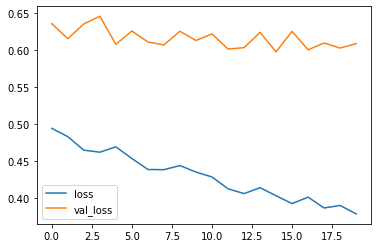

In [54]:
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

In [55]:
model.save('model.h5')

# Test your model

In [56]:
model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.8938